In [1]:
# importing library
import os
import numpy as np
from PIL import Image
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,  Activation
from keras.layers import Dense, Dropout, Activation
import cv2
from scipy import io
from keras.layers import Conv2D, MaxPooling2D, Flatten


Using TensorFlow backend.


#   lists to store image data and corresponding labels
# لیست هایی برای ذخیره داده های تصویر و برچسب های مربوطه

In [2]:
def load_images_from_folder(folder_path, image_size):
    images= []
    labels = []
    class_names = os.listdir(folder_path)
    class_index = 0

    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_folder):
            continue

        for filename in os.listdir(class_folder):
            if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            image_path = os.path.join(class_folder, filename)
            image = Image.open(image_path)
            image = image.convert('RGB')  # Convert image to RGB format if it has an alpha channel (PNG)
            image = image.resize(image_size)
            image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
            images.append(image)
            labels.append(class_index)

        class_index += 1

    images = np.array(images)
    labels = np.array(labels)
   

    return images, labels, class_names

if __name__ == "__main__":
    data_folder_train="E:/python/porject ali allahvrdi/split-random/train" 
    data_folder_test = "E:/python/porject ali allahvrdi/split-random/test"  # The address of the folder containing the classes folders
    image_size = (64, 64)  # images size
    images_train,labels_train,class_names=load_images_from_folder(data_folder_train,image_size)
    images_test, labels_test, class_names = load_images_from_folder(data_folder_test, image_size)
    

  

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:/python/porject ali allahvrdi/split-random/train'

In [ ]:
images_test[0].shape

(64, 64, 3)

In [ ]:
x_train=[]
for x in images_train:
    x_train.append(x.reshape(64,64,3))
x_train=np.array(x_train)
x_test=[]
for x in images_test:
    x_test.append(x.reshape(64,64,3))
x_test=np.array(x_test)

y_train =to_categorical(labels_train, num_classes=4)
y_test = to_categorical(labels_test, num_classes=4)

In [ ]:
x_train.shape

(4142, 64, 64, 3)

In [ ]:
x_test.shape

(330, 64, 64, 3)

In [ ]:
y_train.shape

(4142, 4)

In [ ]:
y_test.shape

(330, 4)

### Model architecture
### معماری مدل 


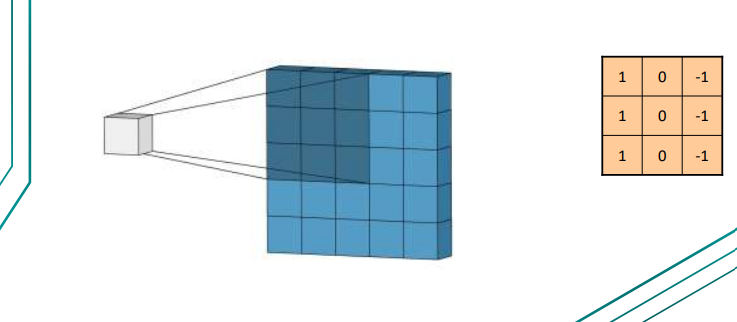
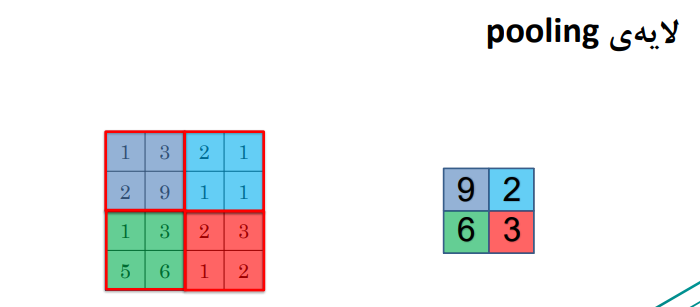
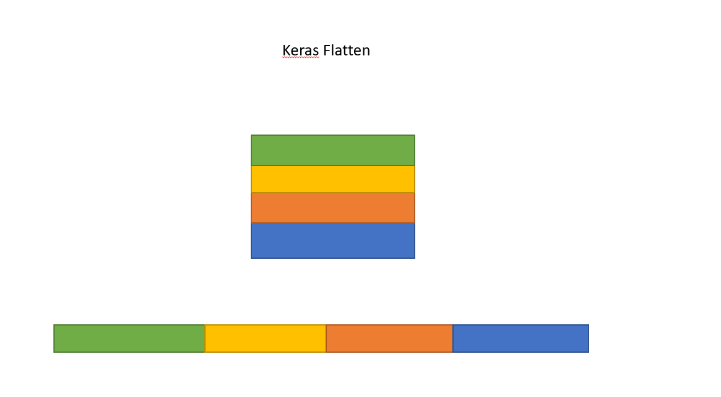

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # لایه پیچشی
model.add(MaxPooling2D((2, 2)))  # لایه پولینگ
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))  # لایه پولینگ
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())  # تبدیل داده‌ها به بردار
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))# پنجاه درصد نورن ها از بین می روند به صورت رندوم
model.add(layers.Dense(4, activation='softmax'))

### Model summery
### خلاصه مدل

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                589888    
__________

### تابع هزینه و بهینه سازی
###  Loss Function & Optimization function


In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

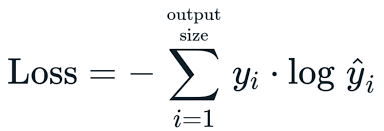
![RMS Prop.png](<attachment:RMS Prop.png>)
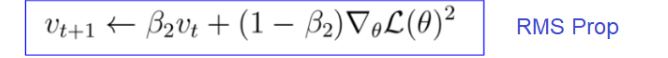

### Model fiting


In [ ]:
model.fit(x_train,y_train,
          epochs=20,
          batch_size=32, validation_split=0.2)

Train on 3313 samples, validate on 829 samples
Epoch 1/20
3313/3313 [==============================] - 32s 10ms/step - loss: 1.0304 - acc: 0.5056 - val_loss: 3.1095 - val_acc: 0.2497
Epoch 2/20
3313/3313 [==============================] - 29s 9ms/step - loss: 0.8838 - acc: 0.5895 - val_loss: 5.7871 - val_acc: 0.2473
Epoch 3/20
3313/3313 [==============================] - 31s 9ms/step - loss: 0.8149 - acc: 0.6254 - val_loss: 7.6484 - val_acc: 0.1689
Epoch 4/20
3313/3313 [==============================] - 31s 9ms/step - loss: 0.7596 - acc: 0.6529 - val_loss: 7.9760 - val_acc: 0.1882
Epoch 5/20
3313/3313 [==============================] - 33s 10ms/step - loss: 0.7242 - acc: 0.6740 - val_loss: 7.1763 - val_acc: 0.2316
Epoch 6/20
3313/3313 [==============================] - 37s 11ms/step - loss: 0.6850 - acc: 0.6957 - val_loss: 7.2369 - val_acc: 0.2364
Epoch 7/20
3313/3313 [==============================] - 35s 11ms/step - loss: 0.6195 - acc: 0.7299 - val_loss: 9.2299 - val_acc: 0.2630
Epoc

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

 64/330 [====>.........................] - ETA: 0s

330/330 [==============================] - 1s 3ms/step

Testing loss: 1.56, acc: 0.86%


In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)
print("predicted:")
print(predicted_classes)
print("True Label:")
print(labels_test)

predicted:
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1
 1 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2
 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
True Label:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 